In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt, dates

Imports several libraries commonly used for data analysis in Python: pandas, numpy, seaborn, matplotlib.pyplot, matplotlib.dates

# **1. Ingestion**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mount Google Drive

In [3]:
file_path = '/content/drive/My Drive/Colab Notebooks/Capstone/msn_02_no_leak.csv'
msn_02_no_leak = pd.read_csv(file_path)

Read a CSV file into a Pandas DataFrame

In [4]:
msn_02_no_leak.head()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF,cumsum_TOTAL_FUEL_USED_DIFF,EXP_FOB,LEAKEGE
0,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,14048.0,0.0,0.0000,1901.16075,1,NaN,0.0,0.0,0.0000,26046.0000,0
1,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,1.0,14048.0,4.0,2.0279,1899.87075,1,NaN,0.0,0.0,2.0279,26043.9721,0
2,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,2.0,14048.0,4.0,2.1544,1901.43475,1,NaN,0.0,0.0,4.1823,26041.8177,0
3,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,3.0,14048.0,6.0,2.0290,1902.22875,1,NaN,0.0,0.0,6.2113,26039.7887,0
4,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,4.0,14048.0,3.0,2.2178,1900.75175,1,NaN,0.0,0.0,8.4291,26037.5709,0


Display the first few rows of the DataFrame.

In [5]:
msn_02_no_leak.shape

(224062, 18)

Print a tuple containing two integers representing the dimensions of the DataFrame msn_02_no_leak.

In [6]:
file_path = '/content/drive/My Drive/Colab Notebooks/Capstone/msn_02_leak.csv'
msn_02_leak = pd.read_csv(file_path)

Reads a CSV file into a Pandas DataFrame

In [7]:
msn_02_leak.head()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF,LEAKEGE_PER_SECOND,TOTAL_FUEL_USED_DIFF_LEAK,cumsum_TOTAL_FUEL_USED_DIFF_LEAK,EXP_FOB,LEAKEGE
0,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,14048.0,0.0,0.0000,1901.16075,1,NaN,0.0,0.0,0.0,0.0000,0.0000,26046.0000,1
1,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,1.0,14048.0,4.0,2.0279,1899.87075,1,NaN,0.0,0.0,0.0,2.0279,2.0279,26043.9721,1
2,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,2.0,14048.0,4.0,2.1544,1901.43475,1,NaN,0.0,0.0,0.0,2.1544,4.1823,26041.8177,1
3,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,3.0,14048.0,6.0,2.0290,1902.22875,1,NaN,0.0,0.0,0.0,2.0290,6.2113,26039.7887,1
4,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,4.0,14048.0,3.0,2.2178,1900.75175,1,NaN,0.0,0.0,0.0,2.2178,8.4291,26037.5709,1


Display the first few rows of the DataFrame

In [8]:
msn_02_leak = msn_02_leak.drop(["LEAKEGE_PER_SECOND", "TOTAL_FUEL_USED_DIFF_LEAK"], axis=1)
msn_02_leak.shape

(224062, 18)

Modifies the msn_02_leak DataFrame by removing two columns and then checks its size

In [9]:
msn_02_leak = msn_02_leak.rename(columns={'cumsum_TOTAL_FUEL_USED_DIFF_LEAK': 'cumsum_TOTAL_FUEL_USED_DIFF'})

Modifies the msn_02_leak DataFrame by renaming a column

In [10]:
msn_02_leak.shape

(224062, 18)

Print a tuple containing the number of rows and columns in the DataFrame

# **2. msn_02_leak & msn_02_no_leak Concatenation to merged_df**

In [11]:
merged_df = pd.concat([msn_02_no_leak, msn_02_leak])
merged_df.shape

(448124, 18)

Combines two DataFrames, msn_02_no_leak and msn_02_leak, into a new DataFrame named merged_df and then checks its size.

In [12]:
merged_df.isna().mean()

UTC_TIME                          0.000000
Flight                            0.000000
FLIGHT_PHASE_COUNT                0.000000
VALUE_FOB                         0.000000
FW_GEO_ALTITUDE                   0.000000
TOTAL_FUEL_USED                   0.000000
SECONDS_PER_FLIGHT                0.000000
TOTAL_SECONDS_PER_FLIGHT          0.000000
VALUE_FOB_DIFF                    0.000000
TOTAL_FUEL_USED_DIFF              0.000000
FUEL_FLOW_AVE                     0.000000
Cluster                           0.000000
VALUE_FOB_SMOOTHED                0.084628
VALUE_FOB_SMOOTHED_DIFF           0.000000
cumsum_VALUE_FOB_SMOOTHED_DIFF    0.000000
cumsum_TOTAL_FUEL_USED_DIFF       0.000000
EXP_FOB                           0.000000
LEAKEGE                           0.000000
dtype: float64

Calculates and displays the average amount of missing values (NaN) in each column of the DataFrame

In [13]:
merged_df.dropna(inplace=True)

Modifies the DataFrame merged_df by removing rows containing missing values (NaN).

In [14]:
merged_df_copy = merged_df.copy()

Creates a copy of the DataFrame merged_df and assigns it to a new DataFrame named merged_df_copy.

# **3. merged_df_copy Filtering**

In [15]:
merged_df_copy = merged_df_copy.drop(columns=['UTC_TIME','Flight','FLIGHT_PHASE_COUNT','Cluster', 'VALUE_FOB', 'EXP_FOB'])

This code removes the following columns from the DataFrame merged_df_copy:

- 'UTC_TIME' (potentially timestamps)
- 'Flight' (likely flight identifiers)
- 'FLIGHT_PHASE_COUNT' (possibly the number of flight phases)
- 'Cluster' (data clustering information, if applicable)
- 'VALUE_FOB' (smoothed fuel on board, might have been used for calculations)
- 'EXP_FOB' (expected fuel on board considering leakage, might have been used for analysis)

In [16]:
merged_df_copy

,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF,cumsum_TOTAL_FUEL_USED_DIFF,LEAKEGE
499,8223.375,1660.0060,499.0,14048.0,5.0,1.6933,1431.93725,25681.532,0.000,0.000,751.6486,0
500,8222.750,1661.5122,500.0,14048.0,2.0,1.5062,1401.60525,25680.178,1.354,1.354,753.1548,0
501,8222.375,1662.9968,501.0,14048.0,1.0,1.4846,1381.94775,25678.830,1.348,2.702,754.6394,0
502,8222.250,1664.5065,502.0,14048.0,-1.0,1.5097,1368.04025,25677.492,1.338,4.040,756.1491,0
503,8222.375,1666.0969,503.0,14048.0,-2.0,1.5904,1355.03650,25676.170,1.322,5.362,757.7395,0
...,...,...,...,...,...,...,...,...,...,...,...,...
224057,13084.130,9762.1010,6824.0,16002.0,2.0,1.8300,1662.75375,19033.806,2.386,7792.964,12916.7109,1
224058,13140.380,9765.7020,6826.0,16002.0,1.0,1.7740,1662.64700,19031.418,2.388,7795.352,12919.2349,1
224059,13168.630,9767.6410,6827.0,16002.0,3.0,1.9390,1662.62850,19029.026,2.392,7797.744,12921.9239,1
224060,13225.130,9771.4090,6829.0,16002.0,1.0,1.8850,1662.63700,19026.642,2.384,7800.128,12924.5589,1


Display merged_df_copy

In [17]:
merged_df_copy.isna().mean()

FW_GEO_ALTITUDE                   0.0
TOTAL_FUEL_USED                   0.0
SECONDS_PER_FLIGHT                0.0
TOTAL_SECONDS_PER_FLIGHT          0.0
VALUE_FOB_DIFF                    0.0
TOTAL_FUEL_USED_DIFF              0.0
FUEL_FLOW_AVE                     0.0
VALUE_FOB_SMOOTHED                0.0
VALUE_FOB_SMOOTHED_DIFF           0.0
cumsum_VALUE_FOB_SMOOTHED_DIFF    0.0
cumsum_TOTAL_FUEL_USED_DIFF       0.0
LEAKEGE                           0.0
dtype: float64

Calculates the average amount of missing values (NaN) in each column of the DataFrame merged_df_copy

# **4. Predictive Model Creation**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = merged_df_copy.drop('LEAKEGE', axis=1)
y = merged_df_copy['LEAKEGE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

The code uses scikit-learn to prepare data for machine learning. It splits a DataFrame (merged_df_copy) into features (X) and target variable (y). The data is then divided into training and testing sets (60% training, 40% testing). The testing set is further split into a new testing set and a validation set (50% each). The use of StandardScaler suggests that the features are being standardized for consistent scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_val_normalized = min_max_scaler.transform(X_val)
X_test_normalized = min_max_scaler.transform(X_test)
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_val_normalized_df = pd.DataFrame(X_val_normalized, columns=X_val.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)
X_train_normalized_df.shape, X_val_normalized_df.shape, X_test_normalized_df.shape

((246120, 11), (82040, 11), (82040, 11))

Normalizing the feature data using Min-Max scaling, ensuring that the values are within a specified range. The normalized data is then converted back into DataFrames for further use, and the shapes of these DataFrames are displayed.

## **4.1. Logistic Regression Model**

### **4.1.1. Logistic Regression Model**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
log_reg = LogisticRegression()
log_reg.fit(X_train_normalized, y_train)
y_val_pred_log = log_reg.predict(X_val_normalized)
accuracy_log = accuracy_score(y_val, y_val_pred_log)
f1_log = f1_score(y_val, y_val_pred_log)
recall_log = recall_score(y_val, y_val_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log}")
print(f"Logistic Regression F1 Score: {f1_log}")
print(f"Logistic Regression Recall: {recall_log}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9286933203315456
Logistic Regression F1 Score: 0.9257595370440873
Logistic Regression Recall: 0.8931387433272933


Using MinMaxScaler from scikit-learn to normalize the features in the training, validation, and test sets. Creating DataFrames (X_train_normalized_df, X_val_normalized_df, X_test_normalized_df) to store the normalized sets. Displays the shape of the normalized sets for verification.

### **4.1.2. Logistic Regression Model applying GridSearchCV**

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none']
}
log_reg = LogisticRegression(solver='lbfgs', random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_normalized, y_train)
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_
y_val_pred_log = best_log_reg.predict(X_val_normalized)
accuracy_log = accuracy_score(y_val, y_val_pred_log)
f1_log = f1_score(y_val, y_val_pred_log)
recall_log = recall_score(y_val, y_val_pred_log)
print("Best Parameters:", best_params)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"Logistic Regression F1 Score: {f1_log:.4f}")
print(f"Logistic Regression Recall: {recall_log:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Best Parameters: {'C': 0.001, 'penalty': 'none'}
Logistic Regression Accuracy: 0.9314
Logistic Regression F1 Score: 0.9290
Logistic Regression Recall: 0.9019


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Utilizes GridSearchCV to perform hyperparameter tuning for a Logistic Regression model using the provided parameter grid. Fits the model on the training data (X_train_normalized, y_train). Prints and stores the best hyperparameters and the best Logistic Regression model. Makes predictions on the validation set (X_val_normalized). Evaluates the accuracy, F1 score, and recall of the Logistic Regression model on the validation set and prints the results.

In [55]:
import pickle
drive_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/logistic_regression_classifier_2.pkl'
with open(drive_path, 'wb') as file:
    pickle.dump(best_log_reg, file)
print("Model saved in:", drive_path)

Model saved in: /content/drive/MyDrive/Colab Notebooks/Capstone/logistic_regression_classifier_2.pkl


Saving the Logistic Regression Model with GidSearchCV

## **4.2. Decission Tree Model**

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_val_pred_dt = dt_clf.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
f1_dt = f1_score(y_val, y_val_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree F1 Score: {f1_dt}")

Decision Tree Accuracy: 0.990845928815212
Decision Tree F1 Score: 0.9908007398606024


This code utilizes the scikit-learn library to implement a Decision Tree classifier for a binary classification task

## **4.3. XGBoost Model**

In [23]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_normalized, y_train)
y_val_pred_xgb = xgb_clf.predict(X_val_normalized)
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
f1_xgb = f1_score(y_val, y_val_pred_xgb)
recall_xgb = recall_score(y_val, y_val_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")
print(f"XGBoost Recall: {recall_xgb}")

XGBoost Accuracy: 0.9900780107264749
XGBoost F1 Score: 0.9900152102448359
XGBoost Recall: 0.9881727802536853


This code utilizes the XGBoost library to implement an XGBoost classifier for a binary classification task.

In [24]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Capstone/xgboost_classifier.pkl', 'wb') as file:
    pickle.dump(xgb_clf, file)
print("XGBoost model saved successfully as xgboost_classifier.pkl")

XGBoost model saved successfully as xgboost_classifier.pkl


Saving the XGBoost Model

# **5. Predictions on predicted_msn_37**

## **5.1. Ingestion**

In [57]:
import pandas as pd
import pickle
predicted_msn_37 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/predicted_msn_37.csv')

Reading data from a CSV file named 'predicted_msn_37.csv' located in a specific directory and loads it into a pandas DataFrame

In [58]:
predicted_msn_37.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424175 entries, 0 to 2424174
Data columns (total 11 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   UTC_TIME                  object 
 1   Flight                    float64
 2   FLIGHT_PHASE_COUNT        float64
 3   VALUE_FOB                 float64
 4   FW_GEO_ALTITUDE           float64
 5   TOTAL_FUEL_USED           float64
 6   SECONDS_PER_FLIGHT        float64
 7   TOTAL_SECONDS_PER_FLIGHT  float64
 8   VALUE_FOB_DIFF            float64
 9   TOTAL_FUEL_USED_DIFF      float64
 10  FUEL_FLOW_AVE             float64
dtypes: float64(10), object(1)
memory usage: 203.4+ MB


Providing a concise summary of the DataFrame 'predicted_msn_37'

In [59]:
predicted_msn_37.isna().mean()

UTC_TIME                    0.0
Flight                      0.0
FLIGHT_PHASE_COUNT          0.0
VALUE_FOB                   0.0
FW_GEO_ALTITUDE             0.0
TOTAL_FUEL_USED             0.0
SECONDS_PER_FLIGHT          0.0
TOTAL_SECONDS_PER_FLIGHT    0.0
VALUE_FOB_DIFF              0.0
TOTAL_FUEL_USED_DIFF        0.0
FUEL_FLOW_AVE               0.0
dtype: float64

Calculating the proportion of missing values in each column of the DataFrame

In [63]:
predicted_msn_37.dropna(inplace=True)

Dropping the null values

## **5.2. predicted_msn_37 FILTERING**

In [61]:
predicted_msn_37 = predicted_msn_37[predicted_msn_37['FW_GEO_ALTITUDE'] >= 0]

window_size = 500
predicted_msn_37['VALUE_FOB_SMOOTHED'] = predicted_msn_37.groupby('Flight')['VALUE_FOB'].transform(lambda x: x.rolling(window=window_size).mean())
predicted_msn_37.reset_index(drop=True, inplace=True)

predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'] = predicted_msn_37.groupby('Flight')['VALUE_FOB_SMOOTHED'].diff(periods=1)
predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'] = np.multiply(predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'], -1)
predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'] = predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'].fillna(0)

predicted_msn_37['cumsum_VALUE_FOB_SMOOTHED_DIFF'] = predicted_msn_37.groupby('Flight')['VALUE_FOB_SMOOTHED_DIFF'].cumsum()

predicted_msn_37['cumsum_TOTAL_FUEL_USED_DIFF'] = predicted_msn_37.groupby('Flight')['TOTAL_FUEL_USED_DIFF'].cumsum()

In [62]:
columns_to_drop = ['UTC_TIME', 'Flight', 'FLIGHT_PHASE_COUNT', 'VALUE_FOB']
predicted_msn_37.drop(columns=columns_to_drop, inplace=True)

Filtering predicted_msn_37 to get the same columns as in the Logistic Regression Model features

## **5.3. predicted_msn_37 XGBoost PREDICTION**

In [48]:
with open('/content/drive/MyDrive/Colab Notebooks/Capstone/xgboost_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(predicted_msn_37)
final_predicted_msn_37 = predicted_msn_37
final_predicted_msn_37['Predicted_LEAKAGE'] = predictions

Predicting the new column of final_predicted_msn_37

In [49]:
final_predicted_msn_37.head()

,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF,cumsum_TOTAL_FUEL_USED_DIFF,Predicted_LEAKAGE
0,1504.0,0.0,0.0,11640.0,0.0,0.0,1570.378485,NaN,0.0,0.0,0.0,0
1,1547.0,0.0,1.0,11640.0,10.0,0.0,1570.378485,NaN,0.0,0.0,0.0,0
2,1586.0,0.0,2.0,11640.0,10.0,0.0,1819.865628,NaN,0.0,0.0,0.0,0
3,1630.0,0.0,3.0,11640.0,7.0,0.0,1820.295423,NaN,0.0,0.0,0.0,0
4,1673.0,0.0,4.0,11640.0,9.0,0.0,1838.104680,NaN,0.0,0.0,0.0,0


Printing the 5 first rows of the final DataFrame

In [50]:
leakage_counts = final_predicted_msn_37['Predicted_LEAKAGE'].value_counts()
count_leakage_0 = leakage_counts.get(0, 0)
count_leakage_1 = leakage_counts.get(1, 0)
leakage_percentage = (count_leakage_1/(count_leakage_1+count_leakage_0))*100
print(f"Count of Predicted_LEAKAGE = 0: {count_leakage_0}")
print(f"Count of Predicted_LEAKAGE = 1: {count_leakage_1}")
print(f"Percentage LEAKAGE over non-LEAKAGE: {leakage_percentage}")

Count of Predicted_LEAKAGE = 0: 2330845
Count of Predicted_LEAKAGE = 1: 93299
Percentage LEAKAGE over non-LEAKAGE: 3.8487400088443593


Doing mathematic operations to get the quantity of leakages predicted

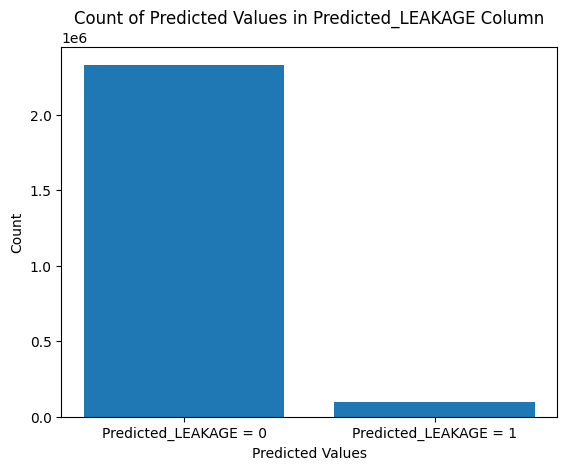

In [51]:
plt.bar(['Predicted_LEAKAGE = 0', 'Predicted_LEAKAGE = 1'], [count_leakage_0, count_leakage_1])
plt.xlabel('Predicted Values')
plt.ylabel('Count')
plt.title('Count of Predicted Values in Predicted_LEAKAGE Column')
plt.show()

Comparing the count of leakages and not_leakages predictions

In [52]:
filtered_data = final_predicted_msn_37[final_predicted_msn_37['Predicted_LEAKAGE'] == 1]
nunique_flights = filtered_data['TOTAL_SECONDS_PER_FLIGHT'].nunique()
print(f"The number of unique values in the 'Flights' column where 'Predicted_LEAKAGE' is 1: {nunique_flights}")

The number of unique values in the 'Flights' column where 'Predicted_LEAKAGE' is 1: 162


Counting the number of different flights with predicted leakage

In [54]:
final_predicted_msn_37.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/final2_predicted_msn_37.csv', index=False)

Saving the final_predicted_msn_37 dataset in Drive as final2_predicted_msn_37.csv

## **5.3. predicted_msn_37 LOGISTIC REGRESSION WITH GRIDSEARCHCV PREDICTION**

In [64]:
with open('/content/drive/MyDrive/Colab Notebooks/Capstone/logistic_regression_classifier_2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(predicted_msn_37)
final_predicted_msn_37 = predicted_msn_37
final_predicted_msn_37['Predicted_LEAKAGE'] = predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [65]:
final_predicted_msn_37.head()

,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF,cumsum_TOTAL_FUEL_USED_DIFF,Predicted_LEAKAGE
499,17354.0,0.0,499.0,11640.0,2.0,0.0,1422.967451,18830.994,0.000,0.000,0.0,0
500,17388.0,0.0,500.0,11640.0,3.0,0.0,1417.156169,18830.986,0.008,0.008,0.0,0
501,17426.0,0.0,501.0,11640.0,-0.0,0.0,1422.967451,18830.998,-0.012,-0.004,0.0,0
502,17458.0,0.0,502.0,11640.0,1.0,0.0,1422.967451,18831.028,-0.030,-0.034,0.0,0
503,17491.0,0.0,503.0,11640.0,1.0,0.0,1422.967451,18831.070,-0.042,-0.076,0.0,0


Printing the 5 first rows of the final DataFrame

In [66]:
leakage_counts = final_predicted_msn_37['Predicted_LEAKAGE'].value_counts()
count_leakage_0 = leakage_counts.get(0, 0)
count_leakage_1 = leakage_counts.get(1, 0)
leakage_percentage = (count_leakage_1/(count_leakage_1+count_leakage_0))*100
print(f"Count of Predicted_LEAKAGE = 0: {count_leakage_0}")
print(f"Count of Predicted_LEAKAGE = 1: {count_leakage_1}")
print(f"Percentage LEAKAGE over non-LEAKAGE: {leakage_percentage}")

Count of Predicted_LEAKAGE = 0: 2231760
Count of Predicted_LEAKAGE = 1: 84101
Percentage LEAKAGE over non-LEAKAGE: 3.6315219264023186


Doing mathematic operations to get the quantity of leakages predicted

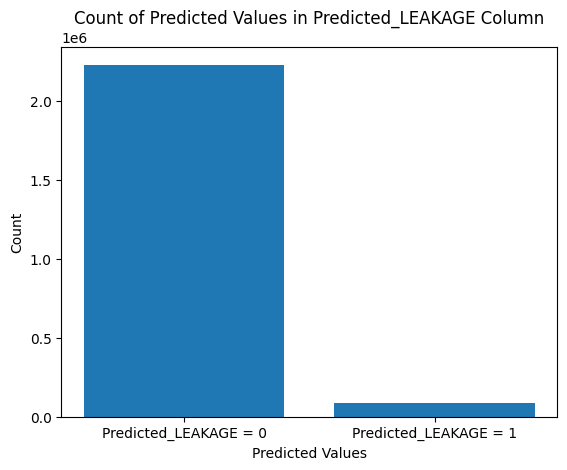

In [67]:
plt.bar(['Predicted_LEAKAGE = 0', 'Predicted_LEAKAGE = 1'], [count_leakage_0, count_leakage_1])
plt.xlabel('Predicted Values')
plt.ylabel('Count')
plt.title('Count of Predicted Values in Predicted_LEAKAGE Column')
plt.show()

Comparing the count of leakages and not_leakages predictions

In [68]:
filtered_data = final_predicted_msn_37[final_predicted_msn_37['Predicted_LEAKAGE'] == 1]
nunique_flights = filtered_data['TOTAL_SECONDS_PER_FLIGHT'].nunique()
print(f"The number of unique values in the 'Flights' column where 'Predicted_LEAKAGE' is 1: {nunique_flights}")

The number of unique values in the 'Flights' column where 'Predicted_LEAKAGE' is 1: 150


Counting the number of different flights with predicted leakage

In [69]:
final_predicted_msn_37.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/final3_predicted_msn_37.csv', index=False)

Saving the final_predicted_msn_37 dataset in Drive as final1_predicted_msn_37.csv